#Gradient Descent Algorithm

#Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Gradient function

In [2]:
def generate_gradient(X, theta, y):
 sample_count = X.shape[0]
 # Calculate the gradient based on the matrix 1/m ∑(((h(x^i)-y^i)) x_j^i)
 return (1./sample_count)*X.T.dot(X.dot(theta)-y)

In [3]:

#Dtaset func
def get_training_data(file_path):
 orig_data = np.loadtxt(file_path,skiprows=1) # Ignore the title in the first row of the dataset.
 cols = orig_data.shape[1]
 return (orig_data, orig_data[:, :cols - 1], orig_data[:, cols-1:])

In [4]:
# Initialize the θ array.
def init_theta(feature_count):
 return np.ones(feature_count).reshape(feature_count, 1)

In [44]:
#Implementing gradient

def gradient_descending(X, y, theta, alpha):
  Jthetas= [] # Record the change trend of the cost function J(θ) to confirm the gradient descent is correct.
  # Calculate the loss function, which is equal to the square of the difference between the actual value and the predicted value: (y^i-h(x^i))^2
  Jtheta = (X.dot(theta)-y).T.dot(X.dot(theta)-y)
  index = 0
  gradient = generate_gradient(X, theta, y) # Calculate the gradient.
  while not np.all(np.absolute(gradient) <= 1e-5): # End the calculation when the gradient is less than 0.00001.
    theta = theta - alpha * gradient
    gradient = generate_gradient(X, theta, y) # Calculate the new gradient.
    # Calculate the loss function, which is equal to the square of the difference between the actual value and the predicted value: (y^i-h(x^i))^2
    Jtheta = (X.dot(theta)-y).T.dot(X.dot(theta)-y)
    if (index+1) % 10 == 0:
        Jthetas.append((index, Jtheta[0])) # Record the result every 10 calculations.
    index += 1
  return theta,Jthetas


In [34]:
# Plot the loss function change curve.
def showJTheta(diff_value):
  p_x = []
  p_y = []
  for (index, sum) in diff_value:
      p_x.append(index)
      p_y.append(sum)
  print(p_x, p_y)
  plt.plot(p_x, p_y, color='g')
  plt.xlabel('steps')
  plt.ylabel('loss funtion')
  plt.title('step - loss function curve')
  plt.show()

In [19]:
# Plot the actual data points and the fitted curve.
def showlinercurve(theta, sample_training_set):

 x, y = sample_training_set[:, 1], sample_training_set[:, 2]
 z = theta[0] + theta[1] * x
 plt.scatter(x, y, color='b', marker='x',label="sample data")
 plt.plot(x, z, color="r",label="regression curve")
 plt.xlabel('x')
 plt.ylabel('y')
 plt.title('liner regression curve')
 plt.legend()
plt.show()

#Results

w:3.0076279423997594 b:1.668677412281192
[9, 19, 29, 39, 49, 59, 69, 79, 89, 99, 109, 119, 129, 139, 149, 159, 169, 179, 189, 199, 209, 219, 229, 239, 249, 259, 269, 279, 289, 299, 309, 319, 329, 339, 349, 359, 369, 379, 389, 399, 409, 419, 429, 439, 449, 459, 469, 479, 489, 499, 509, 519, 529, 539, 549, 559, 569, 579, 589, 599, 609, 619, 629, 639, 649, 659, 669, 679, 689, 699, 709, 719, 729, 739, 749, 759, 769, 779, 789, 799, 809, 819, 829, 839, 849, 859, 869, 879, 889, 899, 909, 919, 929, 939, 949, 959, 969, 979, 989, 999, 1009, 1019, 1029, 1039, 1049, 1059, 1069, 1079, 1089, 1099, 1109, 1119, 1129, 1139, 1149, 1159, 1169, 1179, 1189, 1199, 1209, 1219, 1229, 1239, 1249, 1259, 1269, 1279, 1289, 1299, 1309, 1319, 1329, 1339, 1349, 1359, 1369, 1379, 1389, 1399, 1409, 1419, 1429, 1439, 1449, 1459, 1469, 1479, 1489, 1499, 1509, 1519, 1529, 1539, 1549, 1559, 1569, 1579, 1589, 1599, 1609, 1619, 1629, 1639, 1649, 1659, 1669, 1679, 1689, 1699, 1709, 1719, 1729, 1739, 1749, 1759, 1769, 1779, 1

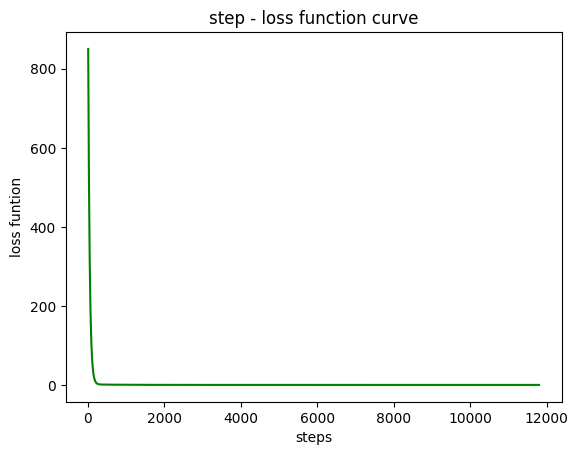

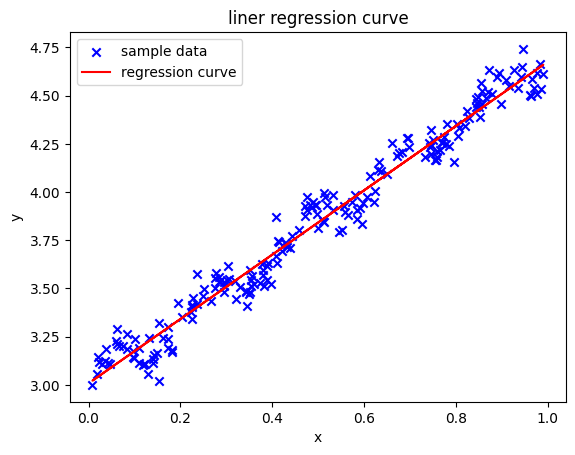

In [45]:
# Read the dataset.
training_data_include_y, training_x, y = get_training_data("/content/drive/MyDrive/lr2_data.txt")
# Obtain the numbers of samples and features, respectively.
sample_count, feature_count = training_x.shape
# Define the learning step α.
alpha = 0.01
# Initialize θ.
theta = init_theta(feature_count)
# Obtain the final parameter θ and cost.
result_theta,Jthetas = gradient_descending(training_x, y, theta, alpha)
# Display the parameter.
print("w:{}".format(result_theta[0][0]),"b:{}".format(result_theta[1][0]))
showJTheta(Jthetas)
showlinercurve(result_theta, training_data_include_y)